In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train[0].shape

(28, 28)

In [4]:
x_train[444]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  14, 116, 137, 251, 178,  15,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  33, 229, 254, 254, 254, 254, 219,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 110, 254, 169,  83,  86, 231, 254,
        169,  13,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  14, 121,  12,   0,   0, 110, 254,
        254,  92,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5, 136,
        254, 240,  34,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42,
        254, 254, 146,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,
        124, 254, 250,  22,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         27, 222, 246,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 196, 175,   4,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 114, 255,  51,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  78, 254, 141,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  78, 255, 141,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 130, 254,  89,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,  88,
        131, 226, 206,  12,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  22, 230,
        255, 254, 170,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  15,
        182, 254, 254, 174,  26,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         17, 182, 224, 254, 213,  58,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  16,  28, 237, 254, 248, 180,  62,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  32, 203, 254, 254, 246, 148,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [6]:
y_train[444]

np.uint8(2)

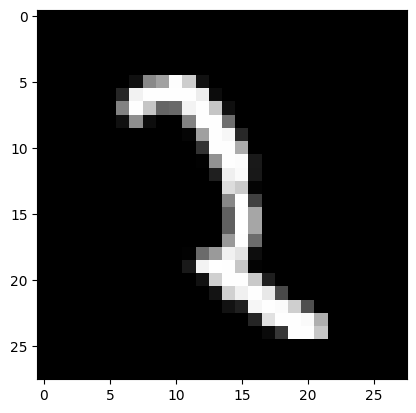

In [7]:
plt.imshow(x_train[444], cmap="Greys_r")

In [8]:
print(x_train.shape, "train samples")
print(x_test.shape, "test samples")

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [9]:
x_train = x_train.reshape(len(x_train), 28 * 28)
x_test = x_test.reshape(len(x_test), 28 * 28)

x_train = x_train.astype("float32")
x_test = x_test.astype("float32")


x_train /= 255
x_test /= 255

In [11]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [12]:
model_1 = Sequential()
model_1.add(Dense(64, activation="relu", input_shape=(784,)))
model_1.add(Dropout(0.2))
model_1.add(Dense(64, activation="relu"))
model_1.add(Dropout(0.2))
model_1.add(Dense(10, activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
learning_rate = 0.001
model_1.compile(
    loss="categorical_crossentropy",
    optimizer=RMSprop(learning_rate=learning_rate),
    metrics=["accuracy"],
)

In [17]:
print(y_train.shape)


(60000, 10, 10)


In [18]:
# If the labels are accidentally one-hot encoded twice:
y_train = y_train.reshape((-1, 10))
y_test = y_test.reshape((-1, 10))


In [19]:
print(y_train.shape)


(600000, 10)


In [21]:
print(y_train.shape)
print(y_test.shape)


(600000, 10)
(100000, 10)


In [25]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

# Load the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess x_train
x_train = x_train.reshape(len(x_train), 28 * 28).astype("float32") / 255
x_test = x_test.reshape(len(x_test), 28 * 28).astype("float32") / 255

# Preprocess y_train - One-hot encode (DO THIS ONLY ONCE)
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Build the model
model_1 = Sequential()
model_1.add(Dense(64, activation="relu", input_shape=(784,)))
model_1.add(Dropout(0.2))
model_1.add(Dense(64, activation="relu"))
model_1.add(Dropout(0.2))
model_1.add(Dense(10, activation="softmax"))

model_1.compile(loss="categorical_crossentropy",
                optimizer=RMSprop(learning_rate=0.001),
                metrics=["accuracy"])

# Check the shapes before training
print("x_train shape:", x_train.shape)  # Should be (60000, 784)
print("y_train shape:", y_train.shape)  # Should be (60000, 10)

# Fit the model
history = model_1.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=30,
    verbose=1,
    validation_data=(x_test, y_test)
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


x_train shape: (60000, 784)
y_train shape: (60000, 10)
Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7404 - loss: 0.8500 - val_accuracy: 0.9412 - val_loss: 0.1975
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9235 - loss: 0.2655 - val_accuracy: 0.9559 - val_loss: 0.1487
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9380 - loss: 0.2076 - val_accuracy: 0.9595 - val_loss: 0.1293
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9472 - loss: 0.1797 - val_accuracy: 0.9632 - val_loss: 0.1187
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9544 - loss: 0.1512 - val_accuracy: 0.9682 - val_loss: 0.1030
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9573 - loss: 0.1448 - val_accuracy: 0.9674 - val_loss: 0.1092
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9610 - loss: 0.1310 - val_accuracy: 0.9718 - val_loss: 0.0981
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/st

In [26]:
history = model_1.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test),
)


Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9782 - loss: 0.0755 - val_accuracy: 0.9763 - val_loss: 0.0990
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9777 - loss: 0.0735 - val_accuracy: 0.9764 - val_loss: 0.1002
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9777 - loss: 0.0727 - val_accuracy: 0.9757 - val_loss: 0.1011
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9778 - loss: 0.0724 - val_accuracy: 0.9756 - val_loss: 0.0989
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9787 - loss: 0.0702 - val_accuracy: 0.9760 - val_loss: 0.1054
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9789 - loss: 0.0726 - val_accuracy: 0.9764 - val_loss: 0.0977
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9786 - loss: 0.0712 - val_accuracy: 0.9766 - val_loss: 0.1073
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9790 - loss: 0.0696 - val_accuracy: 0.

In [27]:
score = model_1.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.12920793890953064
Test accuracy: 0.9771000146865845


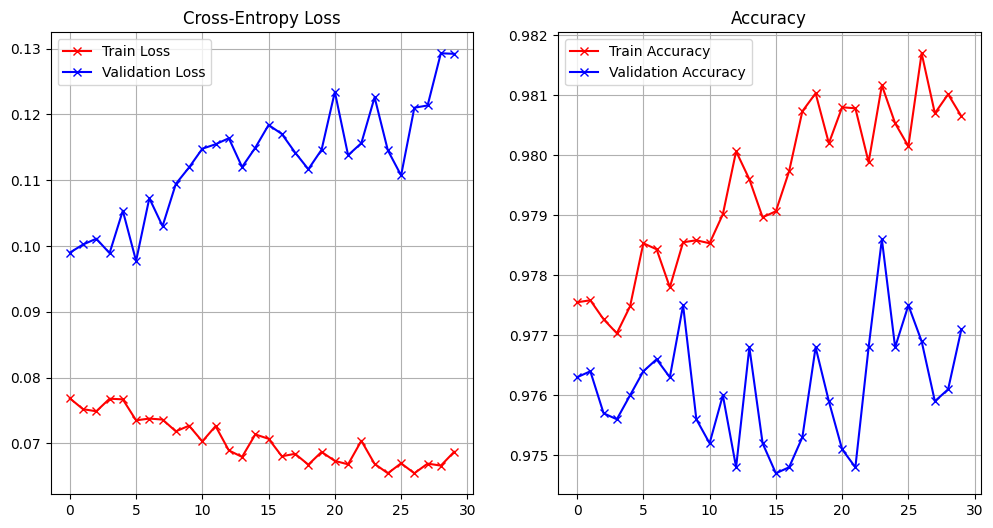

In [28]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))

    # Plot Loss
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"], "r-x", label="Train Loss")
    ax.plot(history.history["val_loss"], "b-x", label="Validation Loss")
    ax.legend()
    ax.set_title("Cross-Entropy Loss")
    ax.grid(True)

    # Plot Accuracy
    ax = fig.add_subplot(1, 2, 2)

    # Try both old and new accuracy keys
    if "accuracy" in history.history:
        train_acc = "accuracy"
        val_acc = "val_accuracy"
    else:
        train_acc = "acc"
        val_acc = "val_acc"

    ax.plot(history.history[train_acc], "r-x", label="Train Accuracy")
    ax.plot(history.history[val_acc], "b-x", label="Validation Accuracy")
    ax.legend()
    ax.set_title("Accuracy")
    ax.grid(True)


plot_loss_accuracy(history)